## IPL Exploratory Data Analysis

#### OBJECTIVES

- Analyze the datasets to figure out the following requirements:
    - The most successful teams in the tournament 
    - Find out successful players and suggest these for endorsements.
    - Figure out the factors that contribute the winning or losing of the teams.

In [2]:
# importing necessary libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [3]:
# forming the data frames from the two available datasets
matches_df = pd.read_csv('matches.csv')
deliveries_df = pd.read_csv('deliveries.csv')

In [4]:
# overeview of the datasets
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [7]:
# making some necessary corrections to the frames to eliminate null values and ensure proper analysis
matches_df.city.fillna('Dubai',inplace=True)
matches_df.winner.fillna('None',inplace=True)
matches_df.player_of_match.fillna('None',inplace=True)

# General Overview of Dataset

In [9]:
#some basic infomation about the tournament 
print('Matches played till now:', matches_df.shape[0])
print('--------------------------------------------------------------------------------------------------------')
print('Total participating teams:', matches_df.winner.unique())
print('--------------------------------------------------------------------------------------------------------')
print('Different locations where the matches were held:', matches_df.city.unique())

Matches played till now: 756
--------------------------------------------------------------------------------------------------------
Total participating teams: ['Sunrisers Hyderabad' 'Rising Pune Supergiant' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Delhi Daredevils' 'Gujarat Lions' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'None' 'Rising Pune Supergiants' 'Delhi Capitals']
--------------------------------------------------------------------------------------------------------
Different locations where the matches were held: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' 'Dubai'
 'Mohali' 'Benga

In [10]:
# making correction 
matches_df.winner.unique()
matches_df.replace('Rising Pune Supergiant','Rising Pune Supergiants', inplace=True)

#### Matches held during each season

In [11]:
# forming the year column to analyze the yearly matches
matches_df['season']=pd.DatetimeIndex(matches_df.date).year

In [12]:
matches_per_season= matches_df.groupby(['season'])['id'].count().reset_index().rename(columns={'id':'matches'})
matches_per_season

,season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


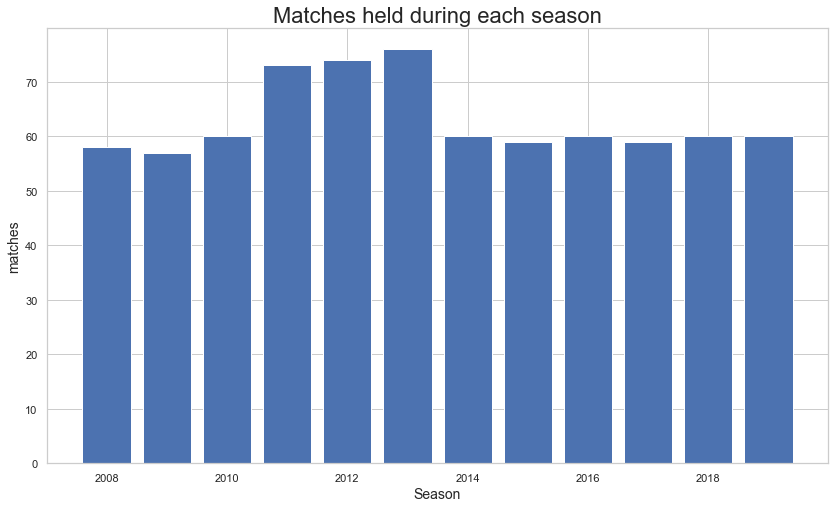

In [13]:
x=np.array(matches_per_season.season)
y=np.array(matches_per_season.matches)

sns.set_theme(style='whitegrid')
plt.figure(figsize=(14,8))
plt.bar(x,y)
plt.xlabel('Season',size=14)
plt.ylabel('matches',size=14)
plt.title('Matches held during each season', size=22)
plt.show()

## Runs scores during each season

In [14]:
# getting the total runs scored in each match form the deliveries dataframe
runs= deliveries_df.groupby(['match_id'])['total_runs'].sum().reset_index()

# using the match_id from matches dataframe to derive the season of each match
runs_df= pd.DataFrame({'match_id': runs.match_id,'total_runs':runs.total_runs,'season':matches_df.season })

# preview of the dataframe
runs_df.head()

,match_id,total_runs,season
0,1,379,2017
1,2,371,2017
2,3,367,2017
3,4,327,2017
4,5,299,2017


In [15]:
# finally grouping together the match id according to seasons to derive the runs scored for each season 
season_runs=runs_df.groupby('season')['total_runs'].sum().reset_index().rename(columns={'total_runs':'runs'})
season_runs

,season,runs
0,2008,17937
1,2009,16353
2,2010,18883
3,2011,21154
4,2012,22453
5,2013,22602
6,2014,18931
7,2015,18353
8,2016,18862
9,2017,18786


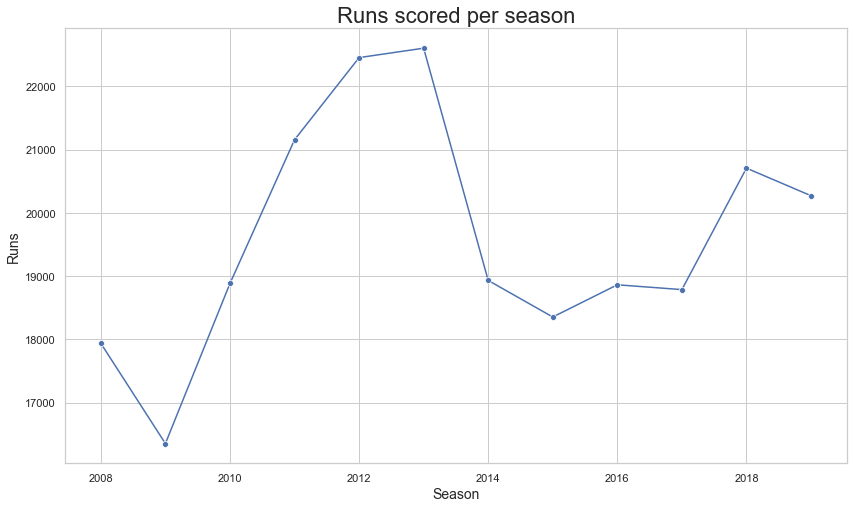

In [16]:
# plotting the results to visualize it for better and easier understanding
x= season_runs.season
y= season_runs.runs

plt.figure(figsize=(14,8))
sns.set_theme(style='whitegrid')
sns.lineplot(x,y,marker='o')
plt.title('Runs scored per season',size=22)
plt.xlabel('Season', size= 14)
plt.ylabel('Runs', size= 14)
plt.show()

## Most Used Venues for the Tournament

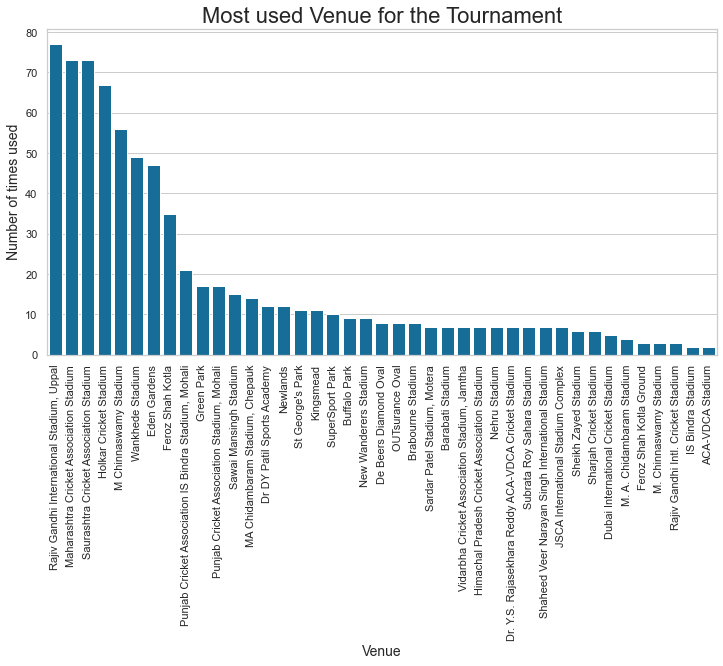

In [17]:
plt.figure(figsize=(12,6))
sns.set_theme(style= 'whitegrid')
sns.barplot(matches_df.venue.unique(),matches_df.venue.value_counts(), color='#0076ae')
plt.title('Most used Venue for the Tournament',size=22)
plt.xlabel('Venue',size=14)
plt.ylabel('Number of times used',size=14)
plt.xticks(rotation=90)
plt.show()

- We can deduce following outcomes from the graph:
    - The different locations that have been used for the tournament throughut the years
    - The most frequently used venues for the matches

# Team Analysis

- Finding the winning rate of various teams 
- Determining the most successful teams of all time

In [18]:
#match win count of different teams in the tournament 
print('The match win counts for the teams till date:')
a= matches_df.winner.value_counts()
a

The match win counts for the teams till date:


Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
None                             4
Name: winner, dtype: int64

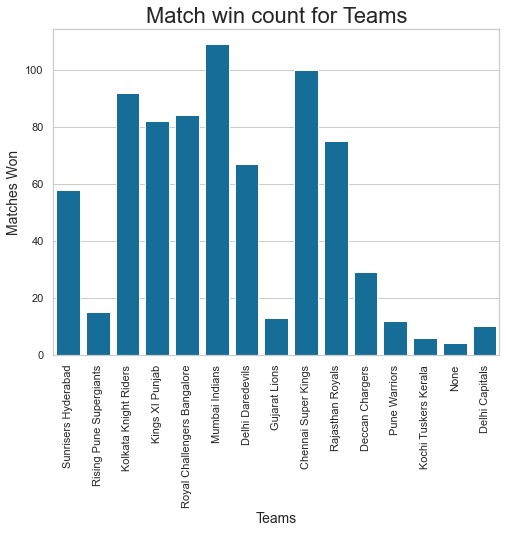

In [19]:
# plotting the match win counts of diffeerent teams in the tournament
plt.figure(figsize= (8,6))
sns.set_theme(style="whitegrid")
sns.countplot(matches_df.winner,color="#0076ae")
plt.xticks(rotation=90)
plt.xlabel('Teams',size=14)
plt.ylabel('Matches Won',size=14)
plt.title('Match win count for Teams',size= 22 )
plt.show()


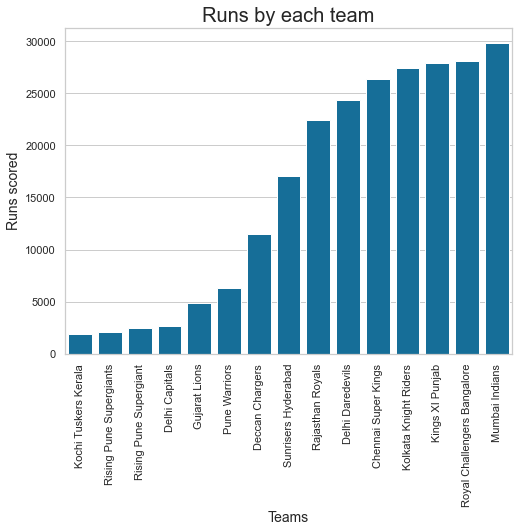

In [20]:
runs_by_teams= deliveries_df.groupby('batting_team')['total_runs'].sum().reset_index().sort_values(by='total_runs',ascending= True)
runs_by_teams.rename(columns={'batting_team':'teams'},inplace=True)
                     
# plotting theis data
x= runs_by_teams.teams
y= runs_by_teams.total_runs
plt.figure(figsize=(8,6))
sns.barplot(x,y,color='#0076ae')
plt.xlabel('Teams',size=14)
plt.ylabel('Runs scored',size=14)
plt.title('Runs by each team',size=20)
plt.xticks(rotation=90)
plt.show()


## Runs by teams during super overs

In [21]:
super_df= deliveries_df[deliveries_df.is_super_over == 1]

runs_s=super_df.groupby(['match_id','batting_team'])['total_runs'].sum().reset_index()
runs_s

,match_id,batting_team,total_runs
0,34,Gujarat Lions,6
1,34,Mumbai Indians,11
2,126,Kolkata Knight Riders,15
3,126,Rajasthan Royals,18
4,190,Chennai Super Kings,9
5,190,Kings XI Punjab,10
6,388,Royal Challengers Bangalore,15
7,388,Sunrisers Hyderabad,20
8,401,Delhi Daredevils,11
9,401,Royal Challengers Bangalore,15


runs scored by the teams in the match: 34


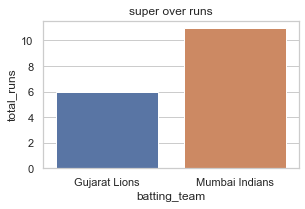

runs scored by the teams in the match: 126


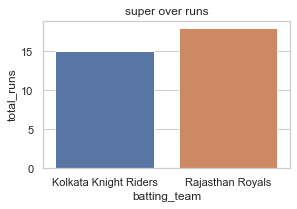

runs scored by the teams in the match: 190


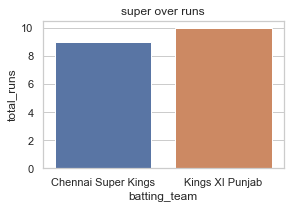

runs scored by the teams in the match: 388


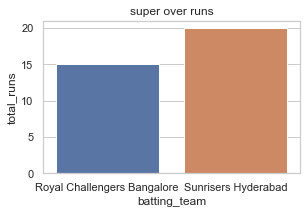

runs scored by the teams in the match: 401


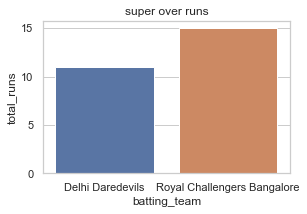

runs scored by the teams in the match: 476


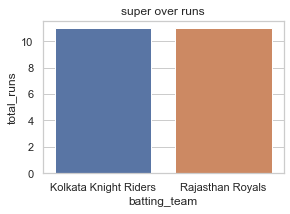

runs scored by the teams in the match: 536


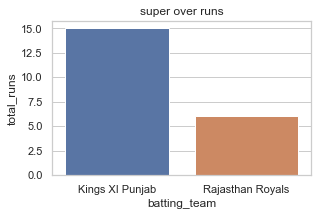

In [22]:
# for i in runs_s.match_id.unique():
list =runs_s.match_id.unique()
for i in range(len(list)):
    temp= runs_s[runs_s.match_id== list[i]]
    plt.figure(figsize=(12,8))
    plt.subplot(3,3,i+1)
    print ('runs scored by the teams in the match:',list[i])
    x= temp.batting_team
    y=temp.total_runs
    sns.barplot(x,y)
    plt.title('super over runs')
    plt.tight_layout()
    plt.show()

- KXIP, RR, RCB have shown a strong performance in the super overs.

 ## Does winning the toss play a significant role in win?

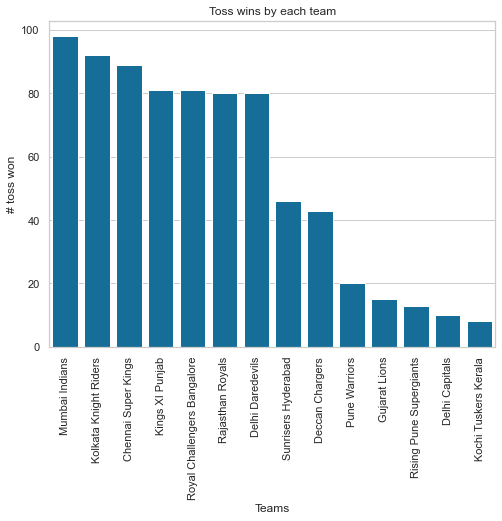

In [23]:
# The number of toss won by each team
toss = matches_df.toss_winner.value_counts()

# Plotting the results
plt.figure(figsize=(8,6))
sns.barplot(toss.index, toss.values, color='#0076ae')
plt.xlabel('Teams')
plt.ylabel('# toss won')
plt.title('Toss wins by each team')
plt.xticks(rotation=90)
plt.show()

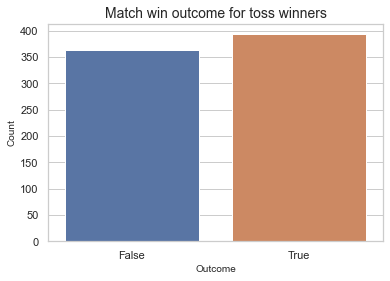

In [24]:
# checking if the toss winner won the match
toss_factor= matches_df.winner == matches_df.toss_winner

# potting the results 
plt.figure(figsize=(6,4))
sns.countplot(toss_factor)
plt.xlabel('Outcome',size=10)
plt.ylabel('Count',size=10)
plt.title('Match win outcome for toss winners',size=14)
plt.show()


- It is evident from the graph that the winning the toss cannot gaurantee a match win.
- The chances of winning a match dpes not depend on the toss

## Toss decision and their Outcomes

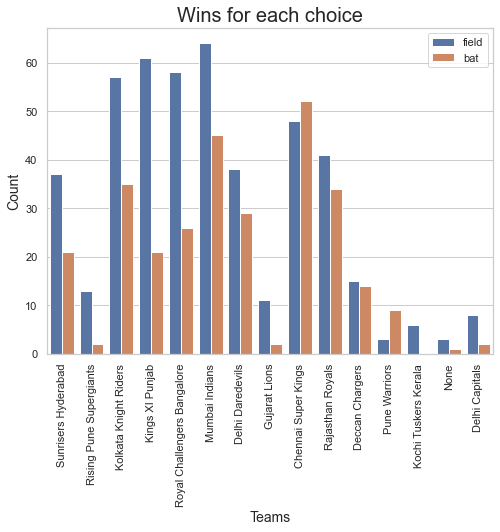

In [25]:
# plotting the wins for each desision by the teams
plt.figure(figsize=(8,6))
sns.countplot(x=matches_df.winner, hue= matches_df.toss_decision)
plt.xlabel('Teams',size=14)
plt.ylabel('Count',size=14)
plt.title('Wins for each choice',size=20)
plt.xticks(rotation=90)
plt.legend(loc=1)
plt.show()

- We can conclude that the more successful teams have won more matches by fielding first.
- This can be interpreted as the teams opting to chase a target have a better chance of winning.

## Best venues for Teams

In [26]:
# best venue for teams
for winner in matches_df.winner.unique():
    v= matches_df.venue[matches_df.winner == str(winner)].mode().to_list()
    print('Best venue for',winner,'is:', v)
    print('-------------------------------------------------------------------------------------------------------')

Best venue for Sunrisers Hyderabad is: ['Rajiv Gandhi International Stadium, Uppal']
-------------------------------------------------------------------------------------------------------
Best venue for Rising Pune Supergiants is: ['Maharashtra Cricket Association Stadium']
-------------------------------------------------------------------------------------------------------
Best venue for Kolkata Knight Riders is: ['Eden Gardens']
-------------------------------------------------------------------------------------------------------
Best venue for Kings XI Punjab is: ['Punjab Cricket Association Stadium, Mohali']
-------------------------------------------------------------------------------------------------------
Best venue for Royal Challengers Bangalore is: ['M Chinnaswamy Stadium']
-------------------------------------------------------------------------------------------------------
Best venue for Mumbai Indians is: ['Wankhede Stadium']
----------------------------------------

- It is evident that the teams perform their best as their home grounds.

# Determining the successful players

- Successful players can be determined by analysing the data to find players who have performed well and got multiple man of the match awards in the tournament
- Also bowlers who take more wickets can be crucial in the matches and can be termed as successful players

## Finding out top Player of Match award holders

In [27]:
# Forming a dataframe of players who have won the player_of_match award
df= matches_df.player_of_match.value_counts().to_dict()
frame=pd.DataFrame({'players':df.keys(),'player_of_match': df.values()})

In [28]:
# Filtering out the players who have won the award more than 5 times
temp= frame[frame.player_of_match> 5.0]

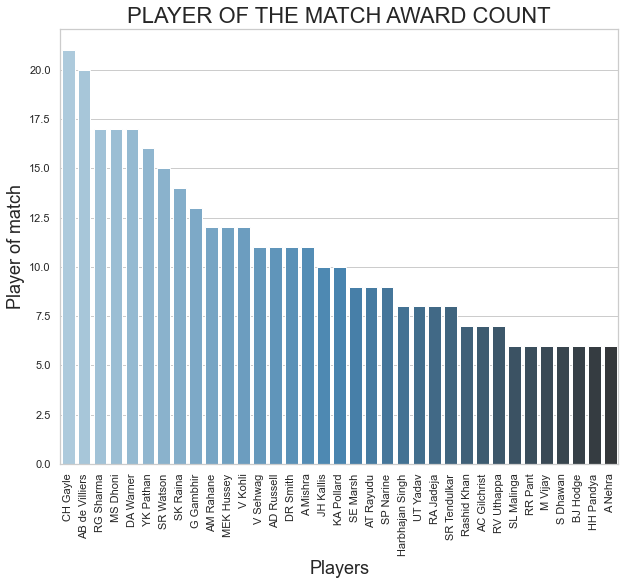

In [29]:
# plotting the dataframe to visualize the results
plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
sns.barplot(temp.players,temp.player_of_match,palette="Blues_d")
plt.xticks(rotation=90)
plt.xlabel('Players',size=18)
plt.ylabel('Player of match',size=18)
plt.title('PLAYER OF THE MATCH AWARD COUNT',size=22)
plt.show()

In [30]:
r= deliveries_df.groupby(['batsman'])['batsman_runs'].sum()
r_dict={}
for player in temp.players:
    r_dict[str(player)] = r[str(player)]
    
r_frame= pd.DataFrame({'players':r_dict.keys(),'runs_scored':r_dict.values()}).sort_values(by = 'runs_scored',ascending=False)
r_frame

,players,runs_scored
11,V Kohli,5434
7,SK Raina,5415
2,RG Sharma,4914
4,DA Warner,4741
31,S Dhawan,4632
0,CH Gayle,4560
3,MS Dhoni,4477
27,RV Uthappa,4446
1,AB de Villiers,4428
8,G Gambhir,4223


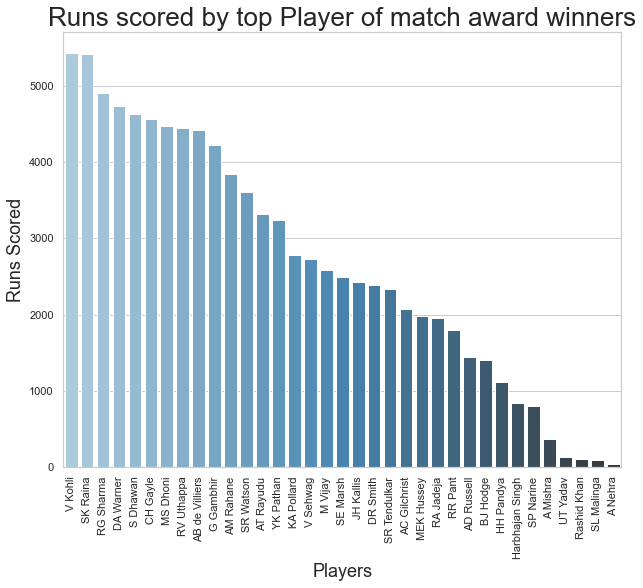

In [31]:
plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
sns.barplot(r_frame.players,r_frame.runs_scored,palette="Blues_d")
plt.xticks(rotation=90)
plt.xlabel('Players',size=18)
plt.ylabel('Runs Scored',size=18)
plt.title('Runs scored by top Player of match award winners',size=26)
plt.show()

## Finding out the top wicket taking bowlers

In [32]:
#finding out the instances from the deliveries dataframe where the bowlers have taken wickets
frame1= deliveries_df[~deliveries_df.player_dismissed.isnull()]
frame1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN


In [33]:
# forming dataframe containing the total wickets taken by each bowler in the tournament
wickets= frame1.groupby('bowler')['player_dismissed'].count().reset_index().rename(
                                    columns={'player_dismissed':'total_wickets_taken'})
wickets.sort_values(by='total_wickets_taken',ascending=False,inplace= True)

In [34]:
#selecting the quantile range where players have taken more than 80 wickets
threshold=wickets.quantile(0.9103)
threshold

total_wickets_taken    80.0612
Name: 0.9103, dtype: float64

In [35]:
w_frame= wickets[wickets.total_wickets_taken>= int(threshold)]
w_frame

,bowler,total_wickets_taken
294,SL Malinga,188
84,DJ Bravo,168
6,A Mishra,165
113,Harbhajan Singh,161
231,PP Chawla,156
48,B Kumar,141
236,R Ashwin,138
300,SP Narine,137
330,UT Yadav,136
247,R Vinay Kumar,127


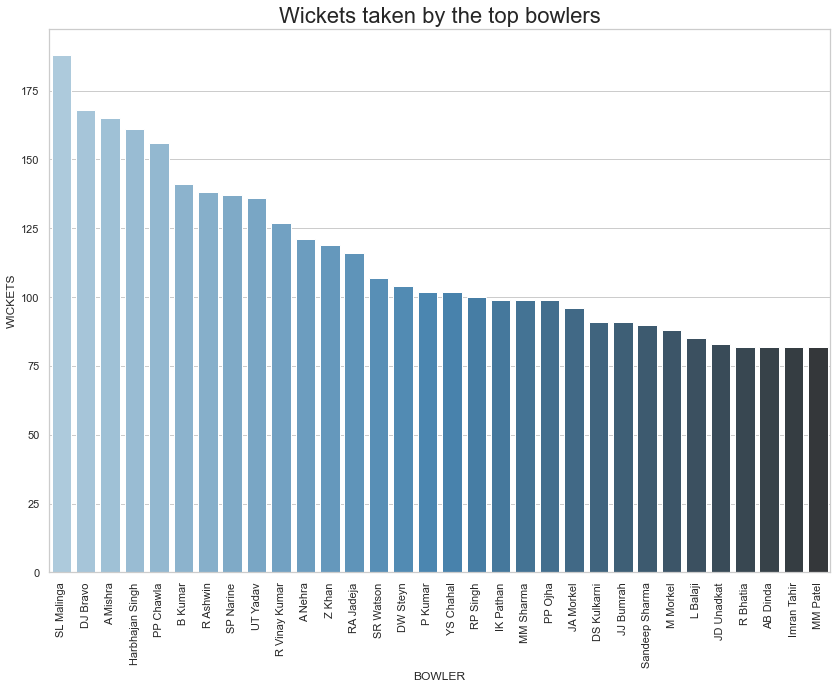

In [36]:
x= w_frame.bowler
y= w_frame.total_wickets_taken

plt.figure(figsize=(14,10))
sns.barplot(x,y,palette="Blues_d")
plt.xticks(rotation=90)
plt.xlabel('BOWLER',size=12)
plt.ylabel('WICKETS',size=12)
plt.title('Wickets taken by the top bowlers', size=22)
plt.show()

- Similar to the previous case we have a list of successful bowlers who play really well and will be star attraction for various teams and can be endorsed.

In [37]:
# creating a dataframe to find different dismissal types by the bowler
xyz= deliveries_df.groupby(['bowler','dismissal_kind'])['match_id'].count().reset_index().rename(columns={'match_id':'wicket_count'})

# checking for the top wicket taker
dismiss_df= xyz[xyz.bowler == 'SL Malinga']
dismiss_df

,bowler,dismissal_kind,wicket_count
986,SL Malinga,bowled,63
987,SL Malinga,caught,91
988,SL Malinga,caught and bowled,5
989,SL Malinga,lbw,11
990,SL Malinga,run out,18


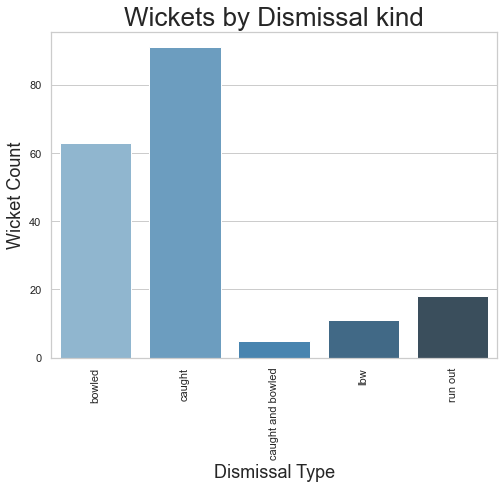

In [38]:
# plotting the dataframe to visualize the results
plt.figure(figsize=(8,6))
sns.set_theme(style="whitegrid")
sns.barplot(dismiss_df.dismissal_kind,dismiss_df.wicket_count,palette="Blues_d")
plt.xticks(rotation=90)
plt.xlabel('Dismissal Type',size=18)
plt.ylabel('Wicket Count',size=18)
plt.title('Wickets by Dismissal kind',size=26)
plt.show()

# THANK YOU